<a href="https://colab.research.google.com/github/go-win0001/Demo/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PCA : RandomForest CLassification on Iris dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris

iris=load_iris()

df=pd.DataFrame(iris.data,columns=iris.feature_names)
X=df
df['target']=iris.target
y=df['target']

#optional : standaization
# stand=StandardScaler();
# x_trans=stand.fit_transform(X)
#split x_trans and do processing
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=10,criterion='entropy',min_samples_split=75)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
ypred=model.predict(X_test)
ypred

0.7105263157894737


array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [ ]:
pca=PCA()
x_pca=pca.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,random_state=42)

In [ ]:
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

ypred=model.predict(X_test)
ypred

pca.explained_variance_ratio_

0.3157894736842105


array([0.92264373, 0.04812763, 0.01826454, 0.00698983, 0.00397426])

In [ ]:
# 4. Build AdaBoost Classifier using Decision Tree as base estimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

base_clf = DecisionTreeClassifier(max_depth=1, random_state=42)  # Stump
ada_clf = AdaBoostClassifier( estimator=base_clf, n_estimators=50, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train, y_train)

# 5. Predict on test set
y_pred = ada_clf.predict(X_test)

# 6. Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of AdaBoost Classifier: {accuracy*100:.2f}%")


#----------- Bagging Classifier using Decision Tree as base estimator--------------

# 3. Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build Bagging Classifier using Decision Tree as base estimator
base_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, random_state=42)
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

# 5. Predict on test set
y_pred = bagging_clf.predict(X_test)

# 6. Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Bagging Classifier: {accuracy*100:.2f}%")


Accuracy of AdaBoost Classifier: 100.00%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# # 4. Build Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier( n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gb_clf.fit(X_train, y_train)
# n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42-->imp hyperparameter

In [ ]:
# 📘 Multiple Linear Regression from Scratch (Sales vs Radio + TV)
# Author: Sujal's ML Practical (BE Computer Engineering)

import numpy as np
import pandas as pd

df=pd.read_csv('data.csv')

# Convert to numpy arrays
X1 = df['Radio'].values
X2 = df['TV'].values
Y = np.array(df['Sales'].values).reshape(-1, 1)
n=len(df)
# Step 2️⃣: Create X matrix (add column of 1s for intercept)
X = np.column_stack((np.ones(n), X1, X2))

# Step 3️⃣: Calculate coefficients using Normal Equation
# B = (X^T * X)^(-1) * X^T * Y
B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

b0, b1, b2 = B[0, 0], B[1, 0], B[2, 0]

print("\n📈 Multiple Linear Regression Equation:")
print(f"Y = {b0:.4f} + {b1:.4f}*Radio + {b2:.4f}*TV")

# Step 4️⃣: Predict values
Y_pred = X.dot(B)

# Step 5️⃣: Calculate RMSE
rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
print(f"✅ RMSE (Root Mean Squared Error): {rmse:.4f}")

# Step 6️⃣: Predict for new user input
new_radio = float(input("\nEnter Radio advertisement cost: "))
new_tv = float(input("Enter TV advertisement cost: "))

predicted_sales = b0 + b1 * new_radio + b2 * new_tv
print(f"📊 Predicted Sales for Radio={new_radio}, TV={new_tv} → {predicted_sales:.2f}")

# # 1. Define your mapping
# transmission_map = {
#     'manual': 0,
#     'automatic': 1
# }

# # 2. Apply the mapping
# df['Transmission'] = df['Transmission'].map(transmission_map)




📈 Multiple Linear Regression Equation:
Y = 3.3536 + 0.2014*Radio + 0.0457*TV
✅ RMSE (Root Mean Squared Error): 1.6331

Enter Radio advertisement cost: 12
Enter TV advertisement cost: 134
📊 Predicted Sales for Radio=12.0, TV=134.0 → 11.90


In [ ]:
#logistic regression
#image_dataset_predict the digit
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()
# dir(digits)
# print(digits)
# print(digits.data[0])
# plt.gray()
# plt.matshow(digits.images[0])
# print(digits.target[0])

x_train, x_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.2)
# help(train_test_split)
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

#small random testing
print(digits.target[67])
# plt.gray()
# plt.matshow(digits.images[67])
model.predict([digits.data[67]])



6


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([6])

In [ ]:
#Logistic Regression IRIS Dataset to predict the flower type 0,1,2
#based on petal,setal width and height both (4 independent variabel)

#import
#make X,Y
#split
#model -> object of LogisticRegression
#.fit(x_train,y_train)
#accuary: .score(x_test,y_test)
#.predict([array mai signle X]) model.predict(y_test)

# #confusion matrix
# import confusion_matrix from sklearn.metrics
# yPred=model.predict(x_test)
# from sklearn.metrics import confusion_matrix
# yPred=model.predic(x_test)
# cm=confusion_matrix(y_test,yPred)
# plot using seaborn.heatmap(cm,annot=True)

import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
# dir(iris)
# print(iris.target_names)
# print(iris.data)
map_table={
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df['Flower_name']=df['target'].map(map_table)

#model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
# df
X=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
Y=df['target']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

model.fit(x_train,y_train)
model.score(x_test,y_test) #acuracy

#ypredicted
yPred=model.predict(x_test)

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,yPred)
# cm


array([1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1,
       2])

Text(95.72222222222221, 0.5, 'Truth')

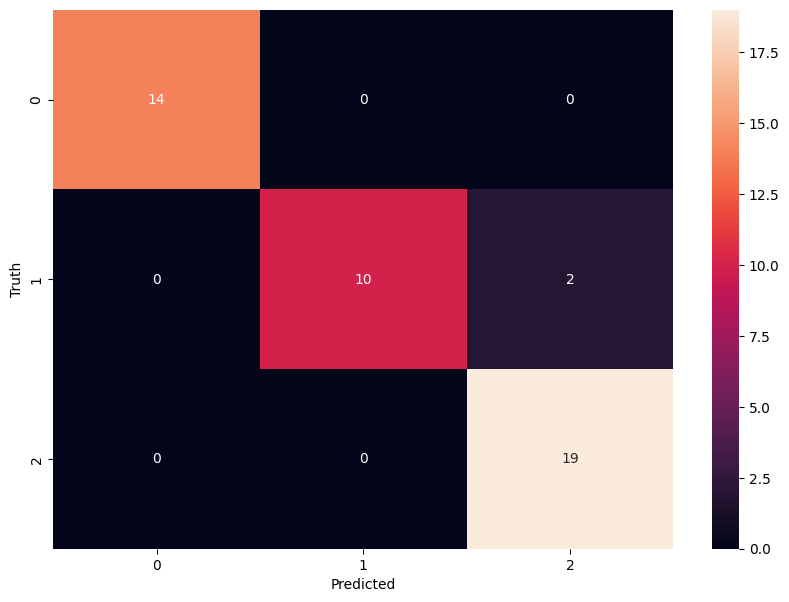

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


[[14  0  0]
 [ 0 11  1]
 [ 0  1 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           3       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



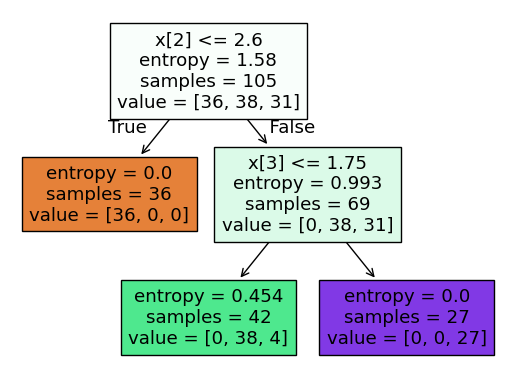

In [ ]:
#decision Tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

df=sn.load_dataset('iris')
mapping={
    'setosa':0,
    'versicolor':1,
    'virginica':3
}
#features set
input=df[['sepal_length','sepal_width','petal_length','petal_width']]
target=df['species'].map(mapping)
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.3)
#model instance

from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2,min_samples_split=2)

model.fit(x_train,y_train)
model.score(x_test,y_test)

#plot
from sklearn import tree
tree.plot_tree(model,filled=True)

#accuracy Report
yPred=model.predict(x_test)
# print(yPred)
# print(np.array(y_test))
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,yPred)
print(cm)
# sn.heatmap(cm,annot=True)
print(classification_report(yPred,y_test))


In [ ]:
from sklearn import datasets
import pandas as pd
ds=datasets.load_breast_cancer();
# dir(ds)
df=pd.DataFrame(ds.data,columns=ds.feature_names)
df['target']=ds.target
df.head()
X=ds.data
X.shape

(569, 30)

In [ ]:
#LINEAR_REGRESSION

import numpy as np

class LinearRegression:
  def __init__(self,lr=0.0001,iters=1000):
    self.lr=lr
    self.iters=iters
    self.weights=None
    self.bias=None

  def fit(self,X,y):
    n,c=X.shape
    self.weights=np.zeros(c)
    self.bias=0

    for _ in range(self.iters):
      yPred=np.dot(X,self.weights)+self.bias

      dw=(2/n)*np.dot(X.T,(yPred-y))
      db=(2/n)*np.sum(yPred-y)

      self.weights= self.weights - self.lr * dw
      self.bias= self.bias - self.lr * db

  def predict(self,X):
       yPred=np.dot(X,self.weights)+self.bias
       return yPred
  def getParameter(self):
    return self.weights,self.bias


RMSE: 3.0958
R2 Score: 0.2123


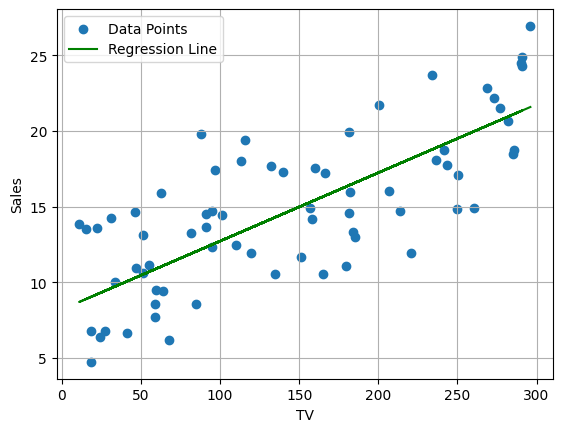

In [ ]:

#LINEAR_REGRESSION
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('/data.csv')
X=np.array(df.TV).reshape(-1,1)
y=df.Sales

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

reg = LinearRegression(lr=0.01, iters=1000)
reg.fit(X_train, y_train)
ypred_test = reg.predict(X_test) # <-- These are predictions for X_test

rmse=np.sqrt(np.mean((ypred_test-y_test)**2))
print(f"RMSE: {rmse:.4f}")

# R2 score
mean=y_test.mean()
ss_tot=np.sum((y_test-mean)**2)
ss_res=np.sum((y_test-ypred_test)**2)
r2=1-(ss_res/ss_tot)
print(f"R2 Score: {r2:.4f}")


#plot
plt.scatter(X,y,label="Data Points")

#line
yfull_pred=reg.predict(x_scaled)
plt.plot(X,yfull_pred,color='green',label='Regression Line')

plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)


# New Section

In [ ]:
#LOGISTIC REGRESSION

import numpy as np

def sigmoid(x):
  x=np.clip(x,-500,500)
  return 1/(1+np.exp(-x))

class LogisticRegression:
  def __init__(self,lr=0.001,iters=2000):
    self.lr=lr
    self.iters=iters
    self.weights=None
    self.bias=None

  def fit(self,X,y):
    n,c=X.shape
    self.weights=np.zeros(c)
    self.bias=0

    for _ in range(self.iters):
      linearPred=np.dot(X,self.weights)+self.bias
      yPred=sigmoid(linearPred)

      dw=(1/n)*np.dot(X.T,(yPred-y))
      db=(1/n)*np.sum(yPred-y)

      self.weights= self.weights - self.lr * dw
      self.bias= self.bias - self.lr * db

  def predict(self,X):
      linearPred=np.dot(X,self.weights)+self.bias
      yPred=sigmoid(linearPred)
      class_label=[0 if y<=0.5 else 1 for y in yPred]
      return class_label

  def getParameter(self):
    return self.weights,self.bias

In [ ]:
#MULTI CLASS LABEL

import seaborn as sn
dataset=sn.load_dataset('iris')
dataset['target']=dataset['species'].map({
    'setosa':0,
    'versicolor':1,
    'virginica':2
})
df=dataset

df
# model=LogisticRegression()


,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
#BINARY LOGISTIC REGRESSION
import pandas as pd
# from sklearn.linear_model import LogisticRegression
df=pd.read_csv('insurance_data.csv')

X=np.array(df.age).reshape(-1,1)
y=np.array(df.bought_insurance)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 1. Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# 2. Transform the test data (using the scaler from train)
X_test_scaled = scaler.transform(X_test)

# 3. Now, re-train your model on the SCALED data
model = LogisticRegression(lr=0.01, iters=10000) # Note: higher lr and iters
model.fit(X_train_scaled, y_train)

# 4. Predict on the SCALED test data
yPred = model.predict(X_test_scaled)

# print(yPred)
# print(y_test)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print("Accuarcy ",accuracy_score(y_test,yPred))

cm=confusion_matrix(y_test,yPred)
print(cm)


    # area = float(input("Enter area: "))
    # bedrooms = float(input("Enter bedrooms: "))
    # user_input = [[area, bedrooms]]

    # # 3. Scale the input using the *same* scaler
    # user_input_scaled = scaler.transform(user_input)

    # # 4. Predict on the scaled input
    # prediction = model.predict(user_input_scaled)


Accuarcy  1.0
[[4 0]
 [0 2]]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- 1. Your Custom Logistic Regression Class (Corrected) ---

def sigmoid(x):
  # Use np.clip to prevent overflow errors on very large/small numbers
  x = np.clip(x, -500, 500)
  return 1/(1+np.exp(-x))

class LogisticRegression:
  def __init__(self,lr=0.01,iters=1000):
    self.lr=lr
    self.iters=iters
    self.weights=None
    self.bias=None

  def fit(self,X,y):
    n,c=X.shape
    self.weights=np.zeros(c)
    self.bias=0

    # Gradient descent with the *correct* log-loss gradient
    for _ in range(self.iters):
      linearPred = np.dot(X,self.weights)+self.bias
      yPred = sigmoid(linearPred)

      # Correct gradient for Logistic Regression is (1/n)
      dw = (1/n) * np.dot(X.T, (yPred-y))
      db = (1/n) * np.sum(yPred-y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self,X):
      # This method returns the final class label (0 or 1)
      yPred_proba = self.predict_proba(X)
      class_label = [0 if y<=0.5 else 1 for y in yPred_proba]
      return np.array(class_label)

  def predict_proba(self, X):
      # This method returns the raw probability (confidence score)
      linearPred = np.dot(X,self.weights)+self.bias
      yPred_proba = sigmoid(linearPred)
      return yPred_proba

  def getParameter(self):
    return self.weights,self.bias

# --- 2. Load and Prepare the Iris Dataset ---

print("Loading and preparing data...")
iris = sns.load_dataset('iris')

# Map string labels ('species') to numbers (0, 1, 2)
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species'] = iris['species'].map(species_map)

# Separate features (X) and target (y)
X = iris.drop('species', axis=1).values
y = iris['species'].values

# --- 3. Split and Scale the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IMPORTANT: Scale features for gradient descent to work
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training on {X_train_scaled.shape[0]} samples, testing on {X_test_scaled.shape[0]} samples.")

# --- 4. Create One-vs-Rest (OvR) Target Labels ---
# We need to create 3 separate 'y' arrays for our 3 models

# y_train_for_0: Is it Class 0? (1 if yes, 0 if no)
y_train_for_0 = np.where(y_train == 0, 1, 0)

# print(X[np.where(y_train == 0)])

# y_train_for_1: Is it Class 1? (1 if yes, 0 if no)
y_train_for_1 = np.where(y_train == 1, 1, 0)

# y_train_for_2: Is it Class 2? (1 if yes, 0 if no)
y_train_for_2 = np.where(y_train == 2, 1, 0)

# --- 5. Train the 3 Binary Classifiers ---

print("Training Model 1 (Class 0 vs. Rest)...")
model_0 = LogisticRegression(lr=0.01, iters=1000)
model_0.fit(X_train_scaled, y_train_for_0)

print("Training Model 2 (Class 1 vs. Rest)...")
model_1 = LogisticRegression(lr=0.01, iters=1000)
model_1.fit(X_train_scaled, y_train_for_1)

print("Training Model 3 (Class 2 vs. Rest)...")
model_2 = LogisticRegression(lr=0.01, iters=1000)
model_2.fit(X_train_scaled, y_train_for_2)

print("All models trained.")

# --- 6. Make Predictions using the OvR Strategy ---

# Get the confidence scores from each model for the *test set*
conf_0 = model_0.predict_proba(X_test_scaled) # Confidence it's class 0
conf_1 = model_1.predict_proba(X_test_scaled) # Confidence it's class 1
conf_2 = model_2.predict_proba(X_test_scaled) # Confidence it's class 2

# Stack the confidences into a single (n_samples, 3) matrix
# e.g., [[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], ...]
all_confidences = np.stack([conf_0, conf_1, conf_2], axis=1)
# print(all_confidences)
# Find the *index* (0, 1, or 2) of the highest confidence score for each sample
y_pred = np.argmax(all_confidences, axis=1)
# print(y_pred)
# --- 7. Evaluate the Final Model ---

accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation ---")
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")
print("Test Predictions:", y_pred)
print("Actual Labels:   ", y_test)

Loading and preparing data...
Training on 120 samples, testing on 30 samples.
Training Model 1 (Class 0 vs. Rest)...
Training Model 2 (Class 1 vs. Rest)...
Training Model 3 (Class 2 vs. Rest)...
All models trained.

--- Model Evaluation ---
Final Model Accuracy: 90.00%
Test Predictions: [1 0 2 2 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual Labels:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- 1. Your Custom Logistic Regression Class (Corrected) ---

def sigmoid(x):
  # Use np.clip to prevent overflow errors on very large/small numbers
  x = np.clip(x, -500, 500)
  return 1/(1+np.exp(-x))

class LogisticRegression:
  def __init__(self,lr=0.01,iters=1000):
    self.lr=lr
    self.iters=iters
    self.weights=None
    self.bias=None

  def fit(self,X,y):
    n,c=X.shape
    self.weights=np.zeros(c)
    self.bias=0

    # Gradient descent with the *correct* log-loss gradient
    for _ in range(self.iters):
      linearPred = np.dot(X,self.weights)+self.bias
      yPred = sigmoid(linearPred)

      # Correct gradient for Logistic Regression is (1/n)
      dw = (1/n) * np.dot(X.T, (yPred-y))
      db = (1/n) * np.sum(yPred-y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self,X):
      # This method returns the final class label (0 or 1)
      yPred_proba = self.predict_proba(X)
      class_label = [0 if y<=0.5 else 1 for y in yPred_proba]
      return np.array(class_label)

  def predict_proba(self, X):
      # This method returns the raw probability (confidence score)
      linearPred = np.dot(X,self.weights)+self.bias
      yPred_proba = sigmoid(linearPred)
      return yPred_proba

  def getParameter(self):
    return self.weights,self.bias

In [ ]:

print("Loading and preparing data...")
iris = sns.load_dataset('iris')

# Map string labels ('species') to numbers (0, 1, 2)
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species'] = iris['species'].map(species_map)

# Separate features (X) and target (y)
X = iris.drop('species', axis=1).values
y = iris['species'].values

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

# --- 3. Split and Scale the Data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# print(len(y_train))

# y_train_for_0: Is it Class 0? (1 if yes, 0 if no)
y_train_for_0 = np.where(y_train == 0, 1, 0)
# print(y_train_for_0)

# print(X[np.where(y_train == 0)])

# y_train_for_1: Is it Class 1? (1 if yes, 0 if no)
y_train_for_1 = np.where(y_train == 1, 1, 0)

# y_train_for_2: Is it Class 2? (1 if yes, 0 if no)
y_train_for_2 = np.where(y_train == 2, 1, 0)

# --- 5. Train the 3 Binary Classifiers ---

print("Training Model 1 (Class 0 vs. Rest)...")
model_0 = LogisticRegression(lr=0.01, iters=1000)
model_0.fit(X_train, y_train_for_0)

print("Training Model 2 (Class 1 vs. Rest)...")
model_1 = LogisticRegression(lr=0.01, iters=1000)
model_1.fit(X_train, y_train_for_1)

print("Training Model 3 (Class 2 vs. Rest)...")
model_2 = LogisticRegression(lr=0.01, iters=1000)
model_2.fit(X_train, y_train_for_2)

print("All models trained.")

# --- 6. Make Predictions using the OvR Strategy ---

# Get the confidence scores from each model for the *test set*
conf_0 = model_0.predict_proba(X_test) # Confidence it's class 0
conf_1 = model_1.predict_proba(X_test) # Confidence it's class 1
conf_2 = model_2.predict_proba(X_test) # Confidence it's class 2

# Stack the confidences into a single (n_samples, 3) matrix
# e.g., [[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], ...]
all_confidences = np.column_stack((conf_0, conf_1, conf_2))
# print(all_confidences)
# Find the *index* (0, 1, or 2) of the highest confidence score for each sample
y_pred = np.argmax(all_confidences, axis=1)#-->rowswise axis=1
# print(y_pred)
# --- 7. Evaluate the Final Model ---

accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation ---")
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")
print("Test Predictions:", y_pred)
print("Actual Labels:   ", y_test)

Loading and preparing data...
Training Model 1 (Class 0 vs. Rest)...
Training Model 2 (Class 1 vs. Rest)...
Training Model 3 (Class 2 vs. Rest)...
All models trained.
[[0.10749559 0.49740014 0.40120283]
 [0.96216234 0.08934608 0.04681936]
 [0.00151405 0.64674385 0.95122188]
 [0.10966631 0.4294134  0.46433997]
 [0.0486387  0.50591968 0.58293643]
 [0.93182919 0.17681655 0.03866212]
 [0.27009866 0.40660236 0.25917048]
 [0.02297949 0.33645256 0.85231005]
 [0.02355585 0.76759793 0.4694154 ]
 [0.16515122 0.52429472 0.2779614 ]
 [0.05492203 0.29338476 0.75570332]
 [0.93581084 0.32838185 0.01667679]
 [0.95786111 0.14987125 0.02963481]
 [0.94012225 0.28746366 0.01876874]
 [0.9785117  0.08442037 0.03018047]
 [0.15062241 0.25110023 0.57912943]
 [0.01909571 0.39777314 0.84205175]
 [0.14688418 0.62582126 0.22490435]
 [0.13982785 0.48226027 0.35358511]
 [0.01529862 0.49417027 0.81670866]
 [0.94938708 0.2435364  0.0200559 ]
 [0.07026274 0.38140059 0.62340991]
 [0.94608886 0.17423015 0.03186223]
 [0.0